<a href="https://colab.research.google.com/github/wrwilliam/my_data7390/blob/main/exercise2_Wei_Ruan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

**import dataset of Titanic**

In [2]:
url="https://raw.githubusercontent.com/wrwilliam/my_data7390/main/Titanic_full.csv"

In [3]:
df=pd.read_csv(url,encoding="unicode_escape")
# df=pd.read_csv(url)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.385791,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486968,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
print('total number of null values : {0}'.format(df.isna().sum().sum()))

total number of null values : 1280


In [7]:
df1 = df.drop(["Name","Cabin","Ticket"],axis = 1)
print(df1.shape)
df1.head(3)

(1309, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Feature', ylabel='Percent missing'>

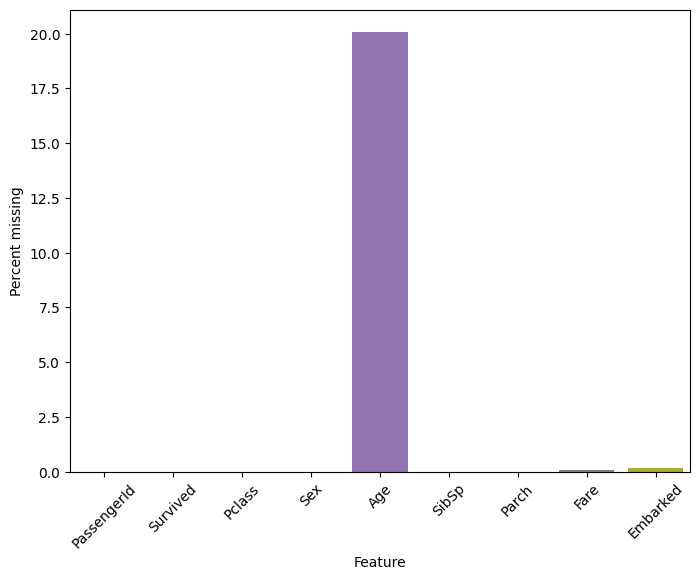

In [9]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df1.isnull().sum()/len(df1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [10]:
df1.shape

(1309, 9)

In [11]:
df1["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
df1["Embarked"] = df1["Embarked"].fillna('S')

In [13]:
df1.count()

PassengerId    1309
Survived       1309
Pclass         1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Fare           1308
Embarked       1309
dtype: int64

In [14]:
df1["Age"].mean()

29.881137667304014

In [15]:
df1["Age"] = df1["Age"].fillna(df1["Age"].mean())

In [16]:
df1.count()

PassengerId    1309
Survived       1309
Pclass         1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Fare           1308
Embarked       1309
dtype: int64

In [17]:
df1["Fare"] = df1["Fare"].fillna(df1["Fare"].mean())

In [18]:
df1.count()

PassengerId    1309
Survived       1309
Pclass         1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Fare           1309
Embarked       1309
dtype: int64

In [19]:
df1.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [20]:
df1["Sex"] = df1["Sex"].map({"male":0,"female":1})

In [21]:
df1 = pd.get_dummies(df1, columns = ["Embarked"])

In [22]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [23]:
df1.shape

(1309, 11)

In [24]:
# import matplotlib.pyplot as plt # plotting
# import seaborn as sns
# import numpy as np # linear algebra

corr = df1.corr()
corr.shape

(11, 11)

<Axes: >

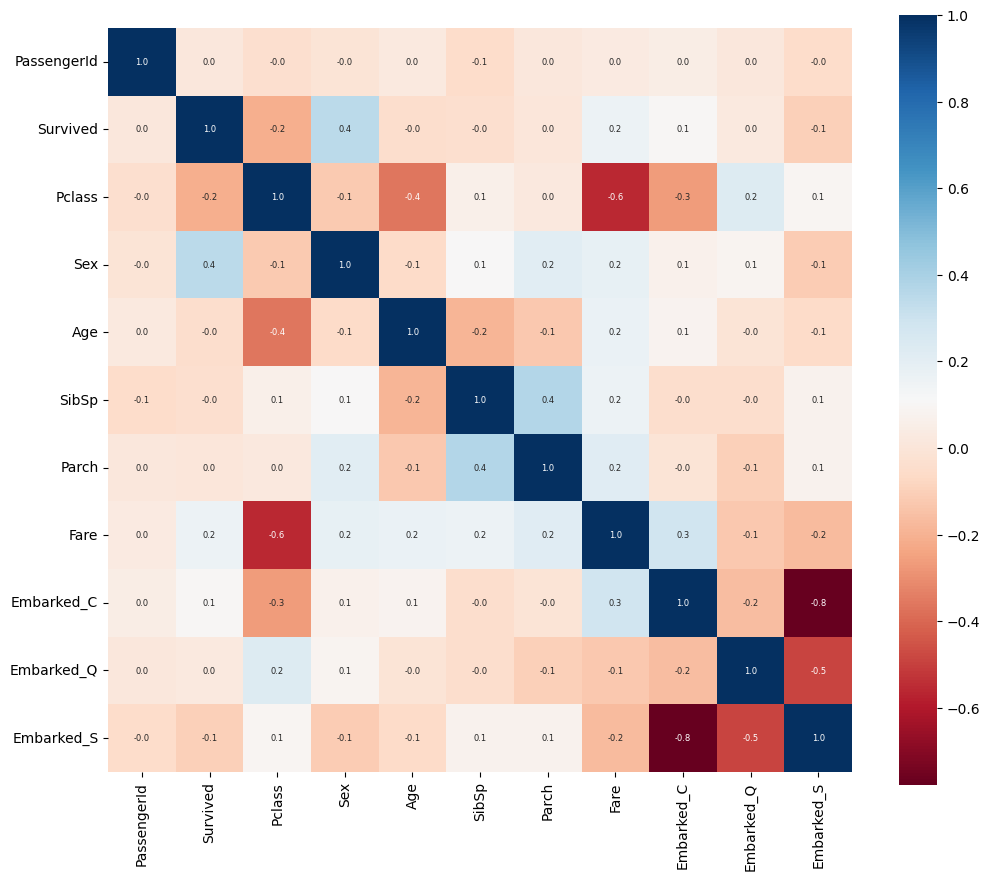

In [25]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':6}, cmap='RdBu')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked_C   1309 non-null   uint8  
 9   Embarked_Q   1309 non-null   uint8  
 10  Embarked_S   1309 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 85.8 KB


In [27]:
from sklearn.model_selection import train_test_split

y = df1["Survived"]
X = df1.drop(["Survived"], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 7 to 778
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1047 non-null   int64  
 1   Pclass       1047 non-null   int64  
 2   Sex          1047 non-null   int64  
 3   Age          1047 non-null   float64
 4   SibSp        1047 non-null   int64  
 5   Parch        1047 non-null   int64  
 6   Fare         1047 non-null   float64
 7   Embarked_C   1047 non-null   uint8  
 8   Embarked_Q   1047 non-null   uint8  
 9   Embarked_S   1047 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 68.5 KB


In [29]:
#Converting dataframe into numpy array
import numpy as np # linear algebra

y_train = np.array(y_train)
X_train = X_train.to_numpy()

y_test = np.array(y_test)
X_test = X_test.to_numpy()

# X_train,X_test,y_train,y_test

In [30]:
#Defining the initial weights and bias
weight = np.zeros(X_train.shape[1])
bias = 0

In [31]:
#Defining the sigmoid function 
import math
def Sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [32]:
from collections import defaultdict

loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = Sigmoid(np.dot(X_train[i],weight) + bias) 
    y = y_train[i]
    loss += np.multiply(np.log(y_pred), y) + np.multiply(np.log(1-y_pred), 1-y)
loss = - loss/X_train.shape[1]
print(loss)

72.5725098046247


In [33]:
# Defining the accuracy metrics 
def accuracy_metrics(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0

In [34]:
# Defining the training hyperparameters
max_epoch = 100
learning_rate = 0.01
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccuracy":[]}

In [35]:
def fit_train():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_train[i],weight) + bias)        
        loss += np.multiply(np.log(y_pred_temp), y_train[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_train[i]) 
        y_pred.append(y_pred_temp)
    loss = -loss/X_train.shape[1]
    
    return y_pred, loss

In [36]:
def fit_test():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_test[i],weight)+bias)        
        loss_test += -(np.multiply(np.log(y_pred_temp), y_test[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_test[i]))
        y_pred_test.append(y_pred_temp)    
        
    return y_pred_test, loss_test

In [37]:

def update_bias(bias):
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [38]:
def update_weight(): 
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learning_rate/X_train.shape[0]
    
    return weight

In [39]:
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%10==0:
        print("====================epoch========================================")
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

====================epoch========================================
Training loss:72.572510
Test loss:0.346574
Training accuracy: 60.458453
Validation accuracy: 65.267176
====================epoch========================================
Training loss:4513.254402
Test loss:17.606973
Training accuracy: 60.458453
Validation accuracy: 65.267176
====================epoch========================================
Training loss:4486.538296
Test loss:17.499248
Training accuracy: 60.458453
Validation accuracy: 65.267176
====================epoch========================================
Training loss:4459.255664
Test loss:17.389527
Training accuracy: 60.553964
Validation accuracy: 65.267176
====================epoch========================================
Training loss:4431.568573
Test loss:17.278517
Training accuracy: 60.553964
Validation accuracy: 65.267176
====================epoch========================================
Training loss:4403.563311
Test loss:17.166590
Training accuracy: 60.553964
Va

In [49]:

# Compute the confusion matrix

# # y_pred_cm = np.rint(y_pred)

# cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

# plt.figure(figsize=(6,6))
# sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
# # plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
# # plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
# # plt.xlabel("Predicted")
# # plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

# from sklearn.metrics import classification_report
 
# print(classification_report(y_test,test_predictionSigmoid))

# # cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

# plt.figure(figsize=(6,6))
# sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)



# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,y_pred_test)
# cm

# # import matplotlib.pyplot as plt
# # from sklearn.metrics import plot_confusion_matrix
 
# # color = 'white'
# # matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
# # matrix.ax_.set_title('Confusion Matrix', color=color)
# # plt.xlabel('Predicted Label', color=color)
# # plt.ylabel('True Label', color=color)
# # plt.gcf().axes[0].tick_params(colors=color)
# # plt.gcf().axes[1].tick_params(colors=color)
# # plt.show()
# # from sklearn.metrics import classification_report
 
# # print(classification_report(y_test,y_pred_test))

# # cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

# plt.figure(figsize=(6,6))
# sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
# # plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
# # plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
# # plt.xlabel("Predicted")
# # plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()


In [40]:
for epoch in range(max_epoch):
  if epoch%100 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 60.458453
Validation accuracy: 64.885496


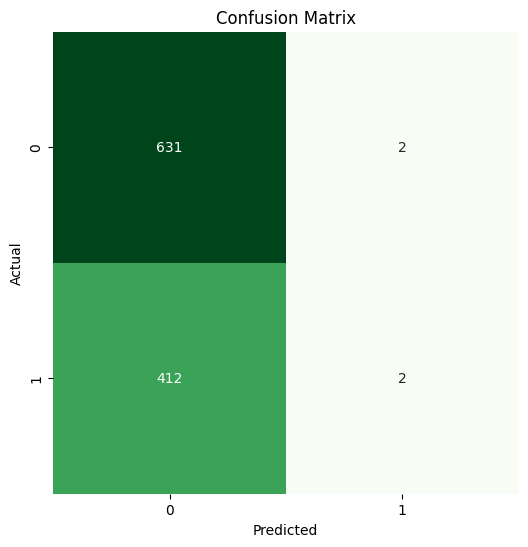

In [45]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,y_pred_test)
# print(cm)


y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5])
plt.yticks(ticks=[0.5,1.5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# tp = cm [0][0]
# fp = cm [1][0]
# tn = cm [1][1]
# fn = cm [0][1]

# precision = tp / (tp + fp)
# recall = tp / (tp + fp)

# f1 = 2 * (precision * recall) / (precision + recall)

# print("F1 score: {}".format(f1,2))

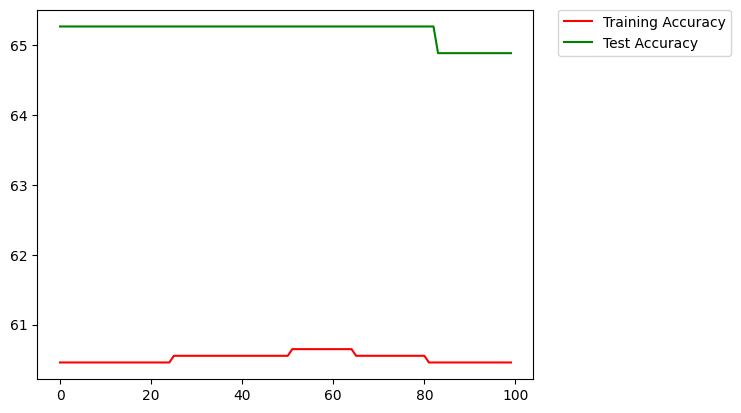

In [46]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

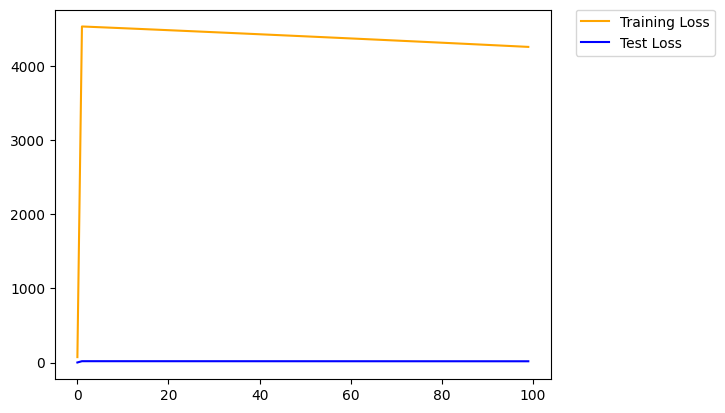

In [47]:
plt.plot(Training_data['trainLoss'],label='Training Loss',color='orange')
plt.plot(Training_data['testLoss'],label='Test Loss',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# ReLu

In [48]:
def ReLu(x):
    return max(0.0, x)

In [49]:

loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = ReLu(np.dot(X_train[i],weight) + bias)
    y = y_train[i]
    loss += (y - y_pred)*(y - y_pred)
loss = loss/2

In [50]:

def fit_train_relu():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = ReLu(np.dot(X_train[i],weight) + bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) 
        y_pred.append(y_pred_temp)
    loss = loss/(2 * X_train.shape[0])
    
    return y_pred, loss

In [51]:

def fit_test_relu():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = ReLu(np.dot(X_test[i],weight)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) 
        y_pred_test.append(y_pred_temp) 
    return y_pred_test, loss_test

In [52]:
#Training the neural network with relu activation function
max_epoch = 50

for epoch in range(max_epoch):

  y_pred, loss = fit_train_relu()
  y_pred_test, loss_test = fit_test_relu()
        
  loss_test = loss_test/(2*X_test.shape[0])
  trainAcc = accuracy_metrics(y_train,y_pred)
  testAcc = accuracy_metrics(y_test,y_pred_test)
    
  Training_data["trainLoss"].append(loss)
  Training_data["testLoss"].append(loss_test)
  Training_data["trainAccuracy"].append(trainAcc)
  Training_data["testAccuracy"].append(testAcc)
    
    
  if epoch%10==0:
    print("Training loss:%f" %(loss))
    print("est loss:%f" %(loss_test))
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))
        
  y_pred = np.array(y_pred)  
  grad_w, bias = update_bias(bias)
  weight = update_weight()

Training loss:0.196905
est loss:0.174353
Training accuracy: 60.649475
Validation accuracy: 64.885496
Training loss:0.196933
est loss:0.175119
Training accuracy: 60.649475
Validation accuracy: 64.885496
Training loss:0.197008
est loss:0.176845
Training accuracy: 60.649475
Validation accuracy: 64.885496
Training loss:0.197353
est loss:0.183594
Training accuracy: 60.553964
Validation accuracy: 64.885496
Training loss:401094567891943.312500
est loss:389175813327428.312500
Training accuracy: 39.541547
Validation accuracy: 34.732824


<ipython-input-50-b81761036f24>:6: RuntimeWarning: overflow encountered in double_scalars
  loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp)
<ipython-input-37-d1be467a6875>:5: RuntimeWarning: overflow encountered in double_scalars
  grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])
<ipython-input-37-d1be467a6875>:7: RuntimeWarning: overflow encountered in double_scalars
  grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])
<ipython-input-37-d1be467a6875>:7: RuntimeWarning: invalid value encountered in double_scalars
  grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])


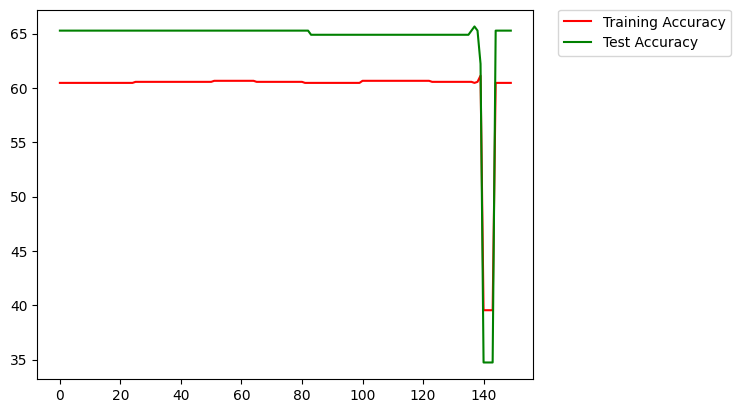

In [53]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

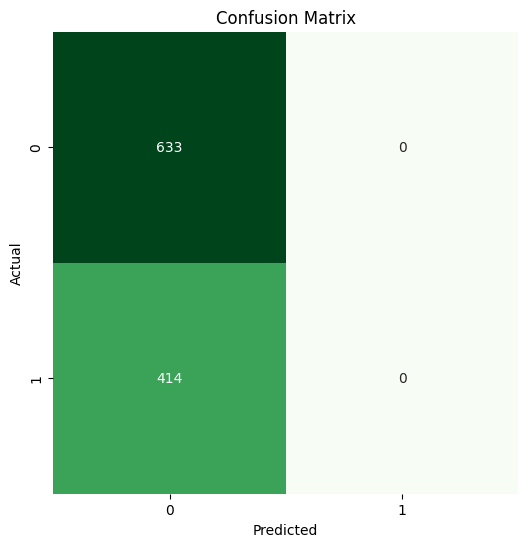

In [55]:
y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5])
plt.yticks(ticks=[0.5,1.5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [56]:
for epoch in range(max_epoch):
  if epoch%50 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 60.458453
Validation accuracy: 65.267176


In [57]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(round(f1,2)))

F1 score: 0.75


# Activation Functions

In [239]:
def sigmoidFunction(a): 
    return 1/(1+np.exp(-a))

def tanh(b):
    c = (np.exp(b)-np.exp(-b))/(np.exp(b)+np.exp(-b))
    return 1-c**2

In [240]:
# Log Loss or Cross Entropy
def logLoss(m,Y,Z):
    return (-1/m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))

**Metrics function**

In [241]:
def Metrics(y_actual,y_pred):
    TP = 0 #True Positives
    TN = 0 # True Negatives
    FP = 0 # False Positives
    FN = 0 # False Negatives

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    
    #Precision Score
    precision = TP / (FP + TP)
    #Recall Score
    recall = TP / (FN + TP)
    #Accuracy
    accuracy = ((TP + TN)/ (TP + FN + TN + FP)) * 100
    #F1 Score
    F1_Score = 2* precision * recall/ (precision + recall)
    print(f'Accuracy: {round(accuracy,2)}%')
    print(f'Precision:{round(precision,2)}')
    print(f'Recall Score:{round(recall,2)}')
    print(f'F1 Score:{round(F1_Score,2)}')

**Single Neuron function with SGD optimization**

In [242]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0.1


    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for i in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #Apply Sigmoid Activation function
            Z = sigmoidFunction(output)

            #calculating cost with Log Loss Method/CrossEntropy
            cost = logLoss(self.m,Y,Z)
            
            if i%1000==0:
                iterationList.append(i)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        print(cost)
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 
  #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=sigmoidFunction(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction

**Training model**

In [243]:
model_wtSigmoid=logisticRegression(total_iterations=10000,learning_rate=0.001)

In [244]:
model_wtSigmoid.train(X_train,y_train)



<ipython-input-240-65751d9e6a4e>:3: RuntimeWarning: divide by zero encountered in log
  return (-1/m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))
<ipython-input-240-65751d9e6a4e>:3: RuntimeWarning: invalid value encountered in multiply
  return (-1/m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))


KeyboardInterrupt: ignored

**Predicting from the trained model**

In [ ]:
test_predictionSigmoid = model_wtSigmoid.predict(X_test)

In [ ]:
Metrics(y_test,test_predictionSigmoid)




**Confusion Metrix**

In [ ]:
X_train,X_test,y_train,y_test


# from sklearn.metrics import confusion_matrix

# y_pred_cm = np.rint(y_pred)

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,test_predictionSigmoid)
cm

# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
 
# color = 'white'
# matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
# matrix.ax_.set_title('Confusion Matrix', color=color)
# plt.xlabel('Predicted Label', color=color)
# plt.ylabel('True Label', color=color)
# plt.gcf().axes[0].tick_params(colors=color)
# plt.gcf().axes[1].tick_params(colors=color)
# plt.show()
from sklearn.metrics import classification_report
 
print(classification_report(y_test,test_predictionSigmoid))

# cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
# plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
# plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fp)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(f1,2))

# Using Tanh Activation

In [ ]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0.01


    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for i in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #Apply Sigmoid Activation function
            Z = tanh(output)

            #calculating cost with Log Loss Method/CrossEntropy
            cost = logLoss(self.m,Y,Z)
            
            if i%1000==0:
                iterationList.append(i)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        print(cost)
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 
      #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=tanh(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction

**Training the Model**

In [ ]:
model_wtTanh=logisticRegression(total_iterations=10000,learning_rate=0.001)

In [ ]:

model_wtTanh.train(X_train,y_train)


In [ ]:
test_predictionTanh = model_wtTanh.predict(X_test)

In [ ]:
Metrics(y_test,test_predictionTanh)

**Confusion Matrix**

In [ ]:
X_train,X_test,y_train,y_test

y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
'''Define impute functions. Impute categorical NaNs with -1, 
where we add 1 to make it 0. For each 
continuous variables, we impute missing values with median values of that
column, and for every variable
where any rows were imputed, add a separate 'imputed or not' column'''

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [55]:
#Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

**hotmap for relationships**

In [7]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra

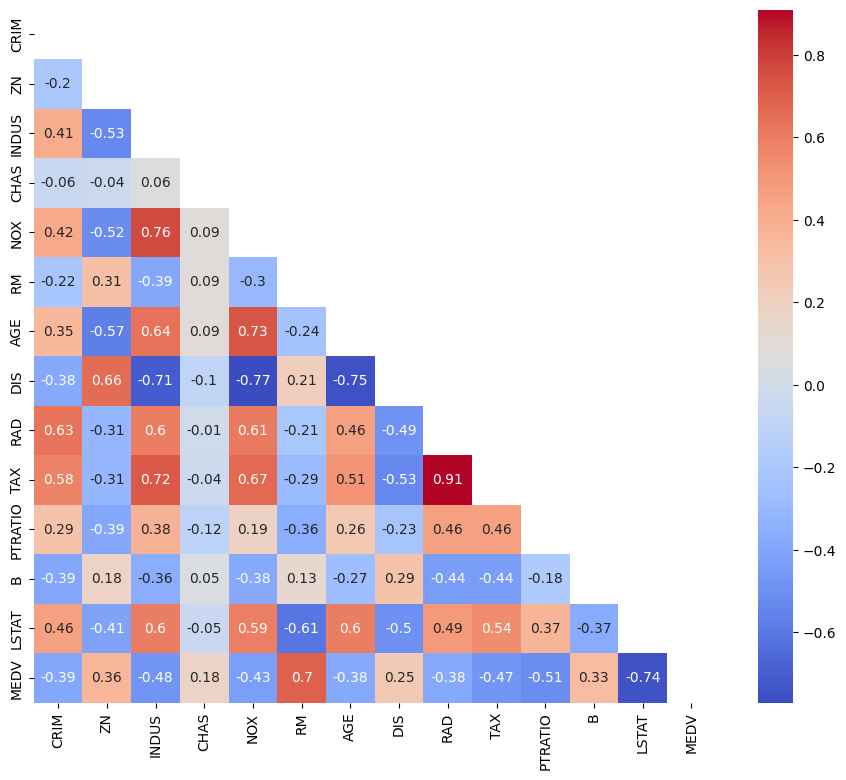

In [8]:
plt.figure(figsize=(11,9))
corr = df.corr().round(2)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# # Want diagonal elements as well
# mask[np.diag_indices_from(mask)] = False

sns.heatmap(data=corr, annot=True,cmap='coolwarm',mask=mask)
plt.xticks(rotation=90)
plt.show()

In [9]:
df.shape


(506, 14)

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
df.nunique()  # Identifying the unique number of values in the dataset

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [15]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

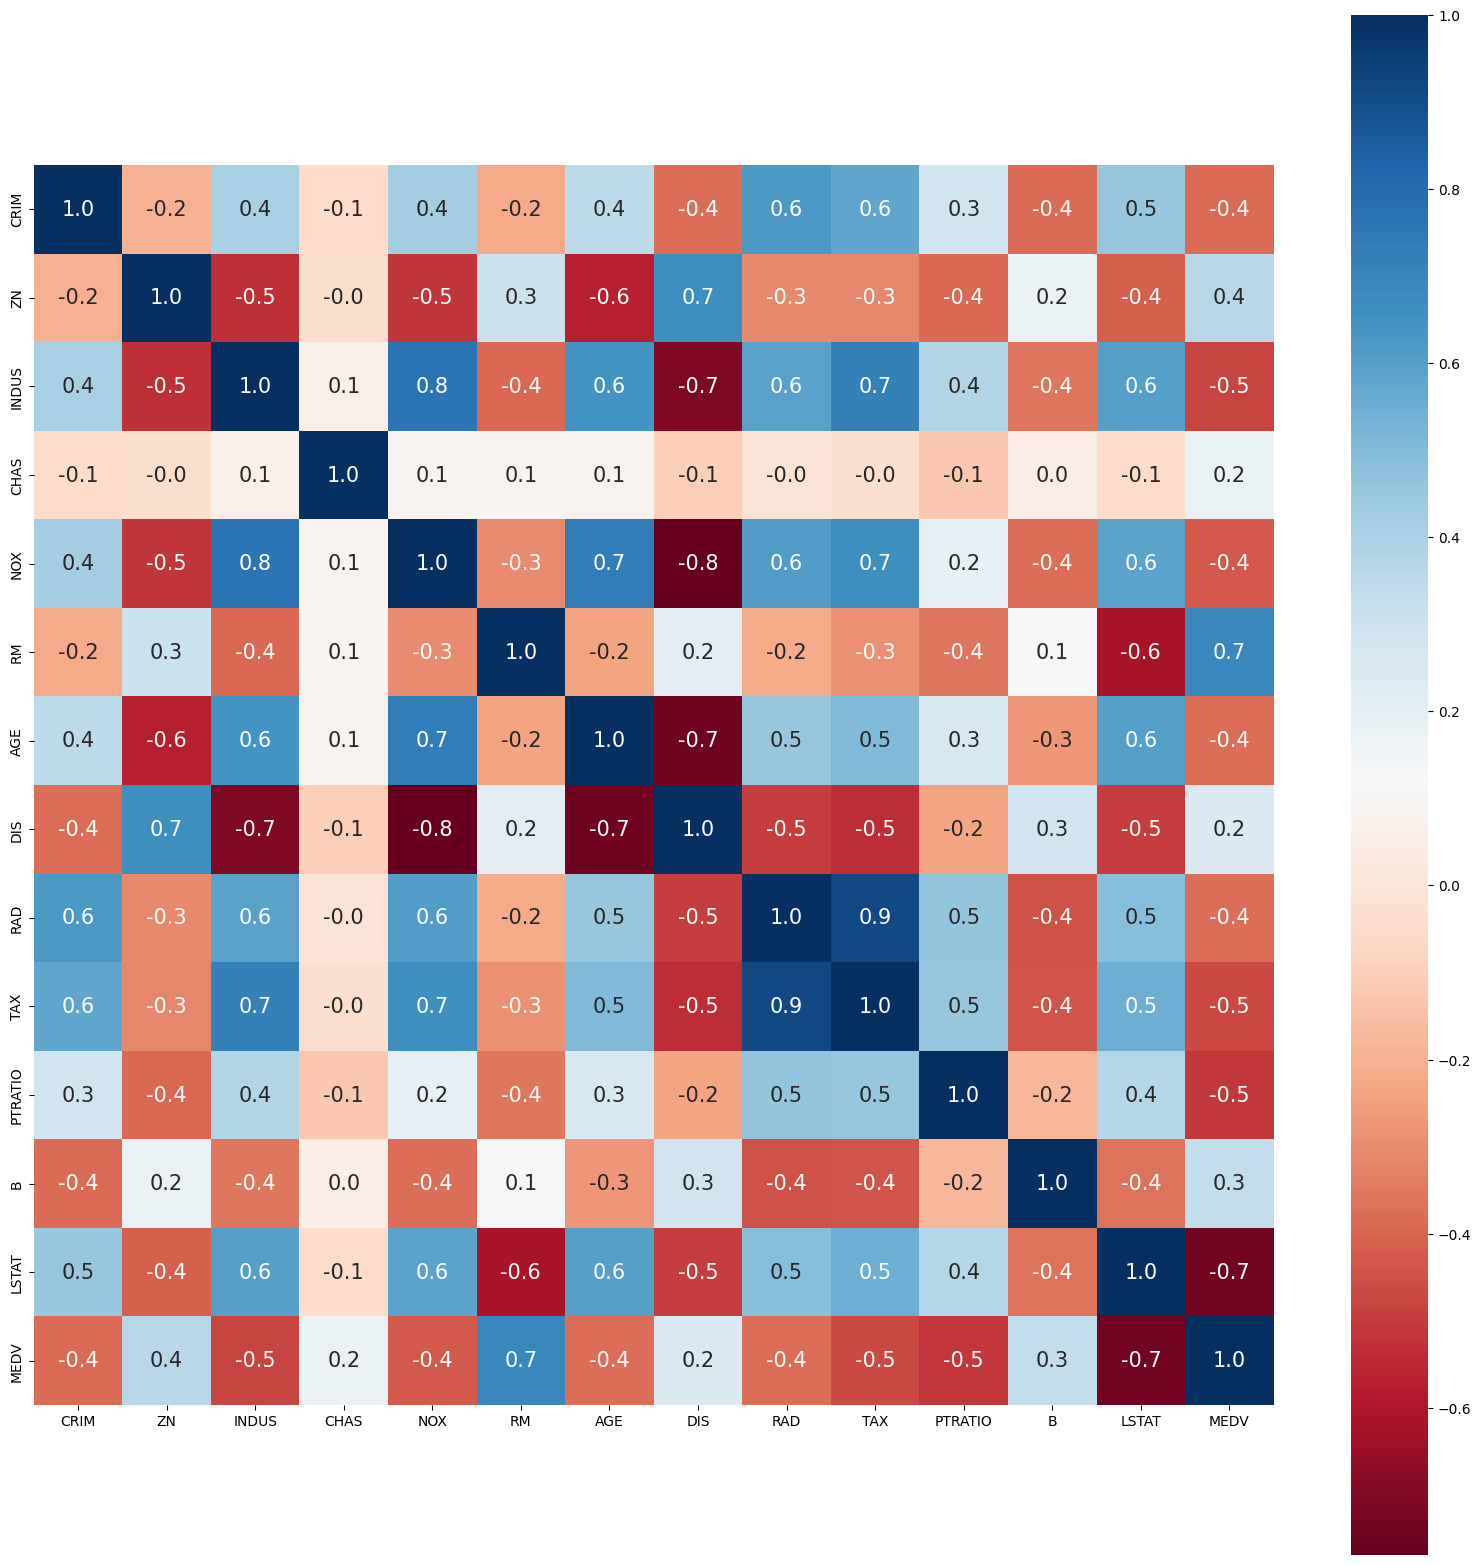

In [18]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='RdBu')

In [19]:
# Spliting target variable and independent variables
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [26]:


#perform normalization 
mean_data= np.mean(X, axis=0)
std_data= np.std(X, axis=0)
X= (X- mean_data)/std_data


In [28]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


In [29]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [30]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.024364,-0.021002,-0.012662,-0.072209,0.016265,-0.053797,0.003052,0.005410,0.025496,0.028405,0.015074,-0.001429,0.016558
std,1.033251,0.992805,1.004016,0.867008,1.011992,0.942675,0.984396,1.020166,1.019690,1.011703,1.006192,1.002757,0.994426
min,-0.419782,-0.487722,-1.516987,-0.272599,-1.465882,-3.880249,-2.335437,-1.267069,-0.982843,-1.313990,-2.707379,-3.907193,-1.531127
25%,-0.411350,-0.487722,-0.876445,-0.272599,-0.913029,-0.568274,-0.816112,-0.802039,-0.637962,-0.764606,-0.488039,0.210937,-0.753163
50%,-0.390099,-0.487722,-0.293537,-0.272599,-0.144217,-0.129123,0.281821,-0.287167,-0.523001,-0.434976,0.297977,0.381570,-0.188262
75%,0.043955,-0.085351,1.015999,-0.272599,0.659147,0.438247,0.895241,0.628739,1.661245,1.530926,0.806576,0.434062,0.617387
max,9.933931,3.804234,2.422565,3.668398,2.732346,3.010825,1.117494,3.960518,1.661245,1.798194,1.638828,0.441052,3.409999


In [31]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,-0.056743,0.048913,0.029489,0.168171,-0.037881,0.125291,-0.007109,-0.012598,-0.059378,-0.066155,-0.035106,0.003328,-0.038562
std,0.922259,1.021431,0.996584,1.246198,0.977125,1.118480,1.041903,0.958009,0.956665,0.975659,0.991176,1.000161,1.018379
min,-0.419003,-0.487722,-1.557842,-0.272599,-1.405414,-3.058221,-2.203863,-1.263551,-0.982843,-1.308051,-2.522434,-3.883072,-1.427399
25%,-0.409882,-0.487722,-0.789629,-0.272599,-0.921667,-0.569343,-0.921904,-0.834353,-0.637962,-0.779455,-0.719220,0.202851,-0.927679
50%,-0.391714,-0.487722,-0.180458,-0.272599,-0.204686,-0.027972,0.418729,-0.240319,-0.523001,-0.577519,0.136150,0.378939,-0.132894
75%,-0.130048,0.370669,1.015999,-0.272599,0.533891,0.630220,0.929023,0.689336,-0.178120,0.170831,0.806576,0.433541,0.523821
max,8.136884,3.589637,2.422565,3.668398,2.732346,3.555044,1.117494,2.580236,1.661245,1.798194,1.268938,0.441052,3.548771


In [32]:
print(X_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [33]:
#Converting dataframe into numpy array
y_train = np.array(y_train)
X_train = X_train.to_numpy()

y_test = np.array(y_test)
X_test = X_test.to_numpy()

In [34]:
X_train.shape

(354, 13)

In [35]:
#Defining the initial weights and bias
weight = np.zeros(X_train.shape[1])
bias = 0

# Activation Functions

In [35]:
def sigmoidFunction(x1): 
    return 1/(1+np.exp(-x1))

def tanh(x2):
    t = (np.exp(x2)-np.exp(-x2))/(np.exp(x2)+np.exp(-x2))
    return 1-t**2

In [ ]:
# log loss 
def logLoss(m,Y,Z):
    return (-1/m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))

In [ ]:
# Metrics function

def Metrics(y_actual,y_hat):
    TP = 0 #True Positives
    FP = 0 # False Positives
    TN = 0 # True Negatives
    FN = 0 # False Negatives

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    #Precision Score
    precision = TP / (FP + TP)
    #Recall Score
    recall = TP / (FN + TP)
    #Accuracy
    accuracy = ((TP + TN)/ (TP + FN + TN + FP)) * 100
    #F1 Score
    F1_Score = 2* precision * recall/ (precision + recall)
    print(f'Accuracy: {round(accuracy,2)}%')
    print(f'Precision:{round(precision,2)}')
    print(f'Recall Score:{round(recall,2)}')
    print(f'F1 Score:{round(F1_Score,2)}')

# Sigmoid activation function

σ(x) = 1 / (1 + e^(-x))

In [36]:
import math

In [37]:
#Defining the sigmoid function 
def Sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [38]:
from collections import defaultdict

loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = Sigmoid(np.dot(X_train[i],weight) + bias) 
    y = y_train[i]
    loss += np.multiply(np.log(y_pred), y) + np.multiply(np.log(1-y_pred), 1-y)
loss = - loss/X_train.shape[1]
print(loss)

18.874930916786248


In [39]:
# accuracy function:
def accuracy_metrics(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0

In [40]:
# Defining the training hyperparameters
max_epoch = 100
learning_rate = 0.01
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccuracy":[]}

In [41]:
def fit_train():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_train[i],weight) + bias)        
        loss += np.multiply(np.log(y_pred_temp), y_train[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_train[i]) 
        y_pred.append(y_pred_temp)
    loss = -loss/X_train.shape[1]
    
    return y_pred, loss

In [42]:
def fit_test():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_test[i],weight)+bias)        
        loss_test += -(np.multiply(np.log(y_pred_temp), y_test[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_test[i]))
        y_pred_test.append(y_pred_temp)    
        
    return y_pred_test, loss_test

In [43]:
def update_bias(bias):
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) #dJ/db
        for j in range(len(weight)):
            grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [44]:
def update_weight(): 
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learning_rate/X_train.shape[0]
    
    return weight

In [46]:
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%10==0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:-1604.900082
Test loss:-31.859429
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1670.106354
Test loss:-33.113755
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1729.417577
Test loss:-34.256062
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1783.744575
Test loss:-35.303429
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1833.814142
Test loss:-36.269543
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1880.212415
Test loss:-37.165480
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1923.417193
Test loss:-38.000291
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-1963.822018
Test loss:-38.781447
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training loss:-2001.754216
Test loss:-39.515174
Training accuracy: 100.000000
Validation accuracy: 100.000000
Training l

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Normalization**

In [ ]:
columns = [col for col in df.columns if len(np.unique(df[col]))>50]
columns.remove('MEDV')
columns

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']

NameError: ignored

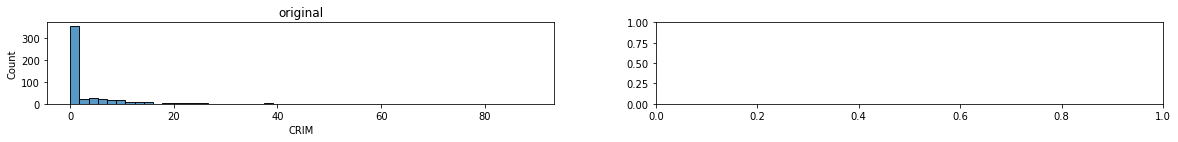

In [ ]:
for col in columns:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,1.5))
    
    sns.histplot(df[col],bins=50,ax=ax[0])
    ax[0].set_title('original')
    
    quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal',n_quantiles=int(len(df)/20), random_state=0)
    X_trans = quantile_transformer.fit_transform(df[col].values.reshape((len(df),1)))
    sns.histplot(X_trans,bins=50,ax=ax[1])
    ax[1].set_title('normalized')
    
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()